## Introduction

Content


The following is the description of the dataset 20 attributes:


•	dateCrawled:  The date when this advertisement was first crawled, all field-values were obtained on this date.

•	name: "name" of the car.

•	seller:  seller type – private or dealer.

•	offerType: Offer Type - offer or request.

•	price: the price in Euro on the advertisement to sell the car.

•	abtest: abtest category - test or control

•	vehicleType: vehicle body type - limousine, small car, station wagon, bus, cabrio, coupe, suv, other.

•	yearOfRegistration: At what year the car was first registered - the age of the car.

•	Transmission: Transmission Type - manual or automatic.

•	powerPS: Car Engine Power in PS

•	model: car model.

•	Kilometer: car mileage in kilometer.

•	monthOfRegistration: the month of the year the car was first registered.

•	fuelType: Fuel Type - gas, diesel, autogas, compressed natural gas, hybrid, other, or electric.

•	Brand: car brand

•	notRepairedDamage: Unrepaired Damage - yes or no.

•	dateCreated: The date the ad was created on Ebay-Kleinanzeigen.

•	nrOfPictures: number of pictures in the ad

•	postalCode: car seller postal code 

•	lastSeen: when the crawler saw this ad last online



## Required Libraries and dataset

In [1]:
# Load the pandas,numpy,matplotlib and other required libraries with an import statement
import pandas as pd                # importing pandas as pd
import numpy as np                 # importing numpy as np    
import matplotlib.pyplot as plt    #importing matplotlib as plt
import seaborn as sns              #importing seaborn as sns
%matplotlib inline
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [2]:
df = pd.read_csv('autos_cleaned_data.csv', sep=',',low_memory=False, encoding ='latin-1')

In [3]:
df.head()

,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online
0,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,2016-03-17 00:00:00,91074.0,2016-03-17 17:40:00
1,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,2016-03-31 00:00:00,60437.0,2016-06-04 10:17:00
2,private,offer,650.0,test,limousine,1995.0,manual,102.0,3er,150000,10.0,gas,bmw,yes,2016-04-04 00:00:00,33775.0,2016-06-04 19:17:00
3,private,offer,2200.0,test,cabrio,2004.0,manual,109.0,2_reihe,150000,8.0,gas,peugeot,no,2016-01-04 00:00:00,67112.0,2016-05-04 18:18:00
4,private,offer,2000.0,control,limousine,2004.0,manual,105.0,3_reihe,150000,12.0,gas,mazda,no,2016-03-26 00:00:00,96224.0,2016-06-04 10:45:00


In [4]:
df.shape

(242205, 17)

In [5]:
# checking duplicates
df.duplicated(keep='first').sum()

883

In [6]:
# Dropping duplicates value
df=df.drop_duplicates(keep='first')
df.shape

(241322, 17)

In [7]:
# Removing column which are not required for further analysis 
df=df.drop(['Date_Created','Seller_Postal_Code','Date_LastSeen_Online'],axis=1)

### Creating New Feature

In [8]:
# Calculate the Age_Of_Car_Months based on Year_of_Car_Registration and Month_of_Car_Registration 

def compute_car_age(Registration_Year, Registration_Month):  
                            
    return (2016-Registration_Year)*12 +(12-Registration_Month)    #Allow Registration till December 2016                   
                                                                                          
df['Age_Of_Car_Months'] = compute_car_age(df['Year_of_Car_Registration'],df['Month_of_Car_Registration'])  

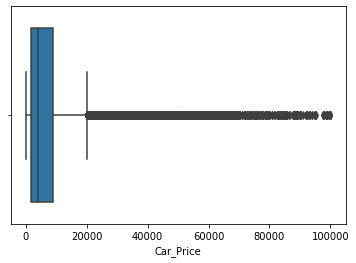

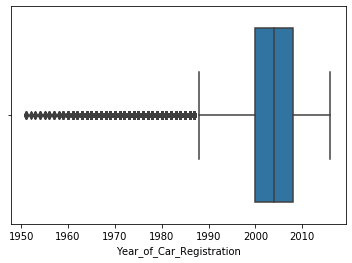

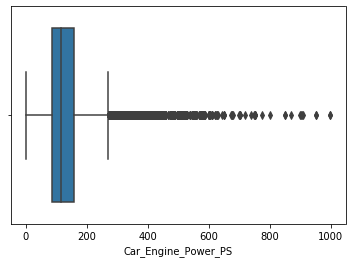

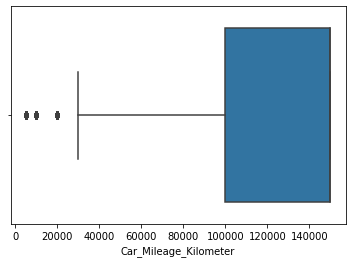

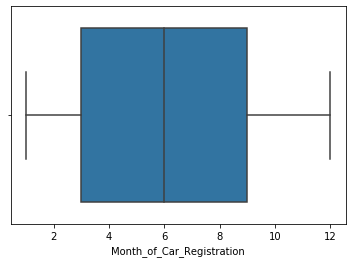

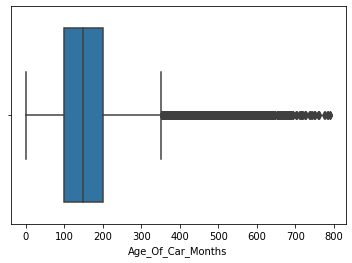

Age_Of_Car_Months


In [9]:
# Checking for outlier 
for i in df:
    if df[i].dtype!='object':
        sns.boxplot(df[i])
        plt.show()
print(i)


In [10]:
# Removing outlier through IQR Method
for i in df:
    if df[i].dtype in ['float64','int64']:
        iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
        ul=df[i].quantile(0.75)+(1.5*iqr)
        ll=df[i].quantile(0.25)-(1.5*iqr)
        df[i]=df[i][(df[i]<ul)&(df[i]>ll)]

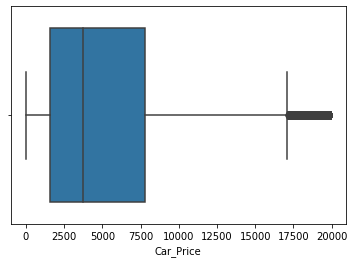

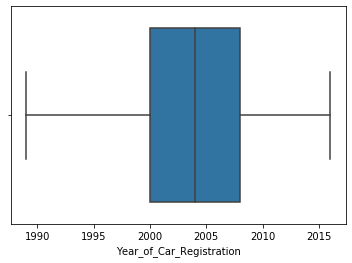

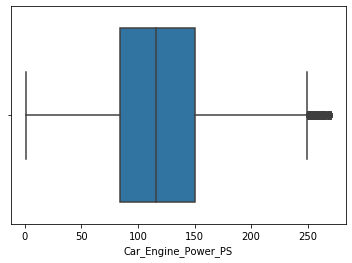

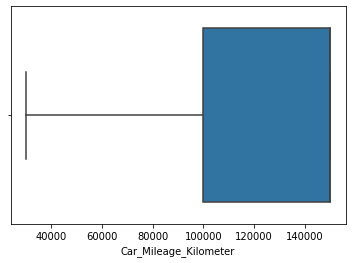

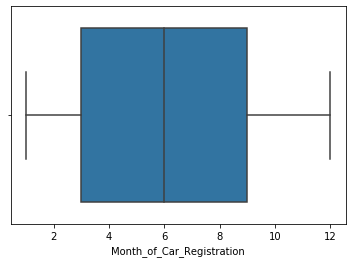

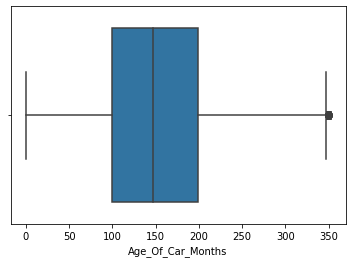

Age_Of_Car_Months


In [11]:
# Again checking for outlier
for i in df:
    if df[i].dtype!='object':
        sns.boxplot(df[i])
        plt.show()
print(i)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241322 entries, 0 to 242204
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Car_Seller_Type            241322 non-null  object 
 1   Offer_Type                 241322 non-null  object 
 2   Car_Price                  225975 non-null  float64
 3   Abtest_Type                241322 non-null  object 
 4   Vehicle_Type               241322 non-null  object 
 5   Year_of_Car_Registration   237256 non-null  float64
 6   Car_Transmission_Type      241322 non-null  object 
 7   Car_Engine_Power_PS        233345 non-null  float64
 8   Car_Model                  241322 non-null  object 
 9   Car_Mileage_Kilometer      233999 non-null  float64
 10  Month_of_Car_Registration  241322 non-null  float64
 11  Fuel_Type                  241322 non-null  object 
 12  Car_Brand                  241322 non-null  object 
 13  UnRepaired_Damage          24

In [13]:
# Dropping null values as we have removed the outlier
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213824 entries, 0 to 242203
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Car_Seller_Type            213824 non-null  object 
 1   Offer_Type                 213824 non-null  object 
 2   Car_Price                  213824 non-null  float64
 3   Abtest_Type                213824 non-null  object 
 4   Vehicle_Type               213824 non-null  object 
 5   Year_of_Car_Registration   213824 non-null  float64
 6   Car_Transmission_Type      213824 non-null  object 
 7   Car_Engine_Power_PS        213824 non-null  float64
 8   Car_Model                  213824 non-null  object 
 9   Car_Mileage_Kilometer      213824 non-null  float64
 10  Month_of_Car_Registration  213824 non-null  float64
 11  Fuel_Type                  213824 non-null  object 
 12  Car_Brand                  213824 non-null  object 
 13  UnRepaired_Damage          21

In [15]:
# convert columns from float64 to int64
df['Year_of_Car_Registration'] = df['Year_of_Car_Registration'].astype('Int64')
df['Month_of_Car_Registration'] = df['Month_of_Car_Registration'].astype('Int64')
df['Car_Mileage_Kilometer'] = df['Car_Mileage_Kilometer'].astype('Int64')
df['Age_Of_Car_Months']=df['Age_Of_Car_Months'].astype('Int64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213824 entries, 0 to 242203
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Car_Seller_Type            213824 non-null  object 
 1   Offer_Type                 213824 non-null  object 
 2   Car_Price                  213824 non-null  float64
 3   Abtest_Type                213824 non-null  object 
 4   Vehicle_Type               213824 non-null  object 
 5   Year_of_Car_Registration   213824 non-null  Int64  
 6   Car_Transmission_Type      213824 non-null  object 
 7   Car_Engine_Power_PS        213824 non-null  float64
 8   Car_Model                  213824 non-null  object 
 9   Car_Mileage_Kilometer      213824 non-null  Int64  
 10  Month_of_Car_Registration  213824 non-null  Int64  
 11  Fuel_Type                  213824 non-null  object 
 12  Car_Brand                  213824 non-null  object 
 13  UnRepaired_Damage          21

In [17]:
df.head()

,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Age_Of_Car_Months
0,private,offer,1500.0,test,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,186
1,private,offer,3600.0,test,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,101
2,private,offer,650.0,test,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,254
3,private,offer,2200.0,test,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,148
4,private,offer,2000.0,control,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,144


In [18]:
# Frequency Counts of kilometer values
df['Car_Mileage_Kilometer'].value_counts()

150000    139590
125000     24829
100000     10002
90000       8267
80000       7315
70000       6399
60000       5726
50000       4735
40000       3772
30000       3189
Name: Car_Mileage_Kilometer, dtype: Int64

In [19]:
# Frequency counts of Vehicle_Type
df['Vehicle_Type'].value_counts()

limousine        62605
small car        50724
station wagon    46004
bus              21495
cabrio           14166
coupe             9564
suv               8021
other             1245
Name: Vehicle_Type, dtype: int64

In [20]:
# Frequency counts of Car_Transmission_Type
df['Car_Transmission_Type'].value_counts()

manual       171643
automatic     42181
Name: Car_Transmission_Type, dtype: int64

In [21]:
# Frequency counts of Car_Model
df['Car_Model'].value_counts().nlargest(20)

golf           17936
andere         13902
3er            13259
polo            7712
corsa           7183
a4              6945
astra           6830
passat          6673
c_klasse        5816
5er             5364
e_klasse        4353
a3              4216
focus           3975
a6              3832
2_reihe         3527
fiesta          3448
transporter     2959
1er             2904
a_klasse        2733
twingo          2593
Name: Car_Model, dtype: int64

In [22]:
# Frequency counts of Fuel_Type
df['Fuel_Type'].value_counts()

gas                       138085
diesel                     71926
autogas                     3185
compressed natural gas       414
hybrid                       154
other                         36
electric                      24
Name: Fuel_Type, dtype: int64

In [23]:
# Frequency counts of Car_Brand
df['Car_Brand'].value_counts()

volkswagen       45740
bmw              23696
opel             22795
mercedes_benz    19763
audi             19002
ford             14882
renault           9966
peugeot           7055
fiat              5359
seat              4403
skoda             4012
mazda             3557
toyota            3289
citroen           3242
smart             2978
nissan            2975
mini              2503
hyundai           2428
volvo             2195
mitsubishi        1782
honda             1723
kia               1647
alfa_romeo        1462
suzuki            1459
chevrolet          980
chrysler           869
dacia              627
subaru             457
daihatsu           446
jeep               420
saab               364
land_rover         333
daewoo             293
lancia             264
jaguar             255
porsche            238
rover              231
lada                94
trabant             40
Name: Car_Brand, dtype: int64

In [24]:
# Frequency counts of UnRepaired_Damage
df['UnRepaired_Damage'].value_counts()

no     192260
yes     21564
Name: UnRepaired_Damage, dtype: int64

## Exploratory Data Analysis

In [25]:
df.to_csv('Model_data.csv',index=False)

In [26]:
# Descriptive or Summary statistics of numeric columns
df.describe()

,Car_Price,Year_of_Car_Registration,Car_Engine_Power_PS,Car_Mileage_Kilometer,Month_of_Car_Registration,Age_Of_Car_Months
count,213824.000000,213824.000000,213824.000000,213824.00000,213824.000000,213824.000000
mean,5096.444295,2003.412793,120.028411,129294.86400,6.378830,156.667657
std,4520.778486,5.165109,46.369394,33551.96577,3.353788,62.029821
min,1.000000,1989.000000,1.000000,30000.00000,1.000000,0.000000
25%,1550.000000,2000.000000,82.000000,125000.00000,3.000000,109.000000
50%,3500.000000,2004.000000,116.000000,150000.00000,6.000000,154.000000
75%,7400.000000,2007.000000,150.000000,150000.00000,9.000000,202.000000
max,19911.000000,2016.000000,270.000000,150000.00000,12.000000,335.000000


In [27]:
# Summary statistics of character or non-numeric columns
df.describe(include=['object'])

,Car_Seller_Type,Offer_Type,Abtest_Type,Vehicle_Type,Car_Transmission_Type,Car_Model,Fuel_Type,Car_Brand,UnRepaired_Damage
count,213824,213824,213824,213824,213824,213824,213824,213824,213824
unique,2,2,2,8,2,246,7,39,2
top,private,offer,test,limousine,manual,golf,gas,volkswagen,no
freq,213823,213823,110982,62605,171643,17936,138085,45740,192260


The above shows limousine, manual, golf, gas and volkswagen are the top Vehicle Type, 
Car Transmission Type, Car Model, Fuel Type and Car Brand respectively.

In [28]:
df.head()

,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Age_Of_Car_Months
0,private,offer,1500.0,test,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,186
1,private,offer,3600.0,test,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,101
2,private,offer,650.0,test,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,254
3,private,offer,2200.0,test,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,148
4,private,offer,2000.0,control,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,144


## Univariate Analysis

<Figure size 936x360 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

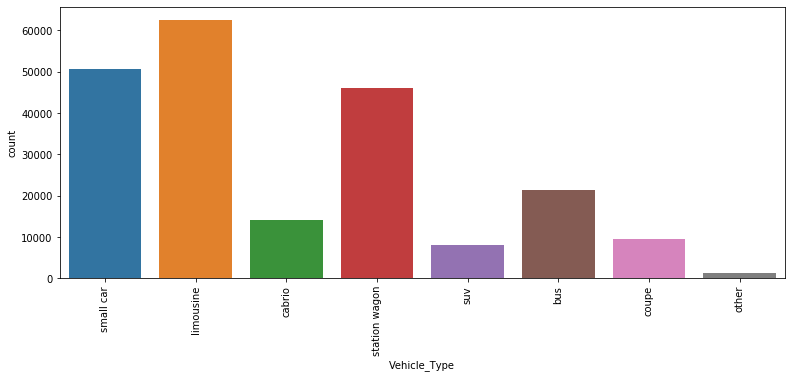

In [29]:
plt.figure(figsize=(13,5))
sns.countplot(x= 'Vehicle_Type',data = df)
plt.xticks(rotation=90)
plt.show()

In [92]:
# so there were more market of Limousine type of car in germany.

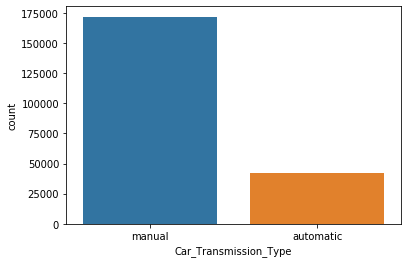

In [30]:
sns.countplot(x= 'Car_Transmission_Type', data = df)
plt.show()

In [ ]:
# Advertisement consist of more count of manual car than automatic

<Figure size 936x360 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

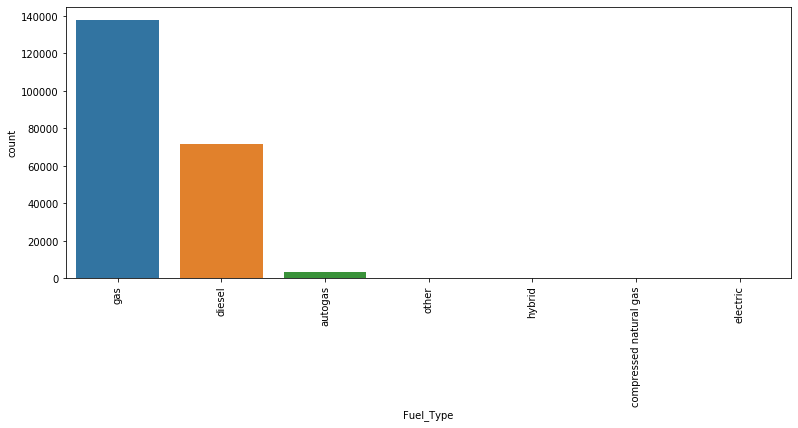

In [121]:
plt.figure(figsize=(13,5))
sns.countplot(x= 'Fuel_Type', data = df)
plt.xticks(rotation=90)
plt.show()

In [122]:
# The advertisement consist of more gas type

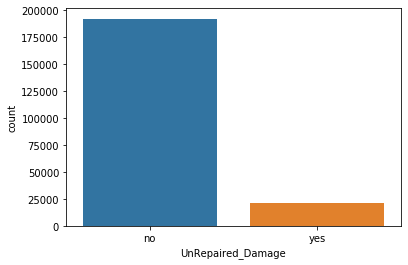

In [32]:
sns.countplot(x= 'UnRepaired_Damage', data = df)
plt.show()

In [123]:
# The car repaired was quite less

<Figure size 936x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Top 10 Car Models ')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Car Models')

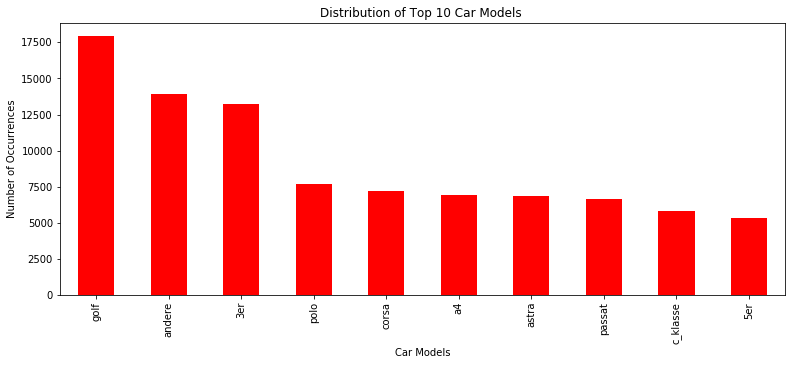

In [33]:
plt.figure(figsize=(13,5))
df['Car_Model'].value_counts().nlargest(10).plot(kind='bar',color='red')
plt.title('Distribution of Top 10 Car Models ')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Car Models', fontsize=10)
plt.show()

In [124]:
# w.r.t the car model golf model was on high

<Figure size 936x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Top 10 Car Brands ')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Car Brands')

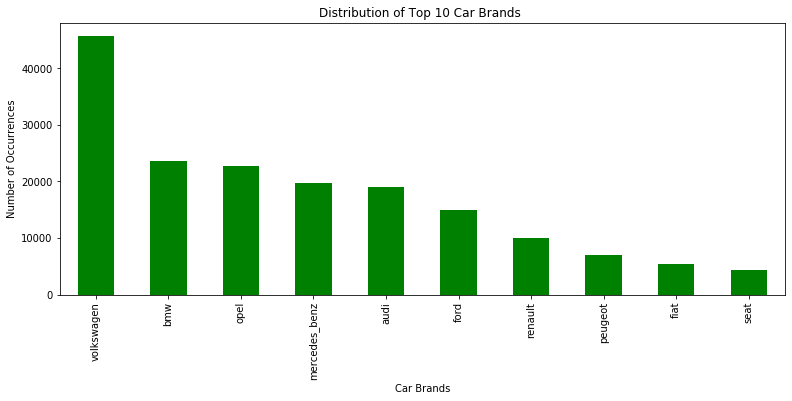

In [34]:
plt.figure(figsize=(13,5))
df['Car_Brand'].value_counts().nlargest(10).plot(kind='bar',color='green')
plt.title('Distribution of Top 10 Car Brands ')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Car Brands', fontsize=10)
plt.show()

In [125]:
# wrt to brand volkswagen was been preferred

<Figure size 936x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Top 10 Car Price(Euros) ')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Car Price')

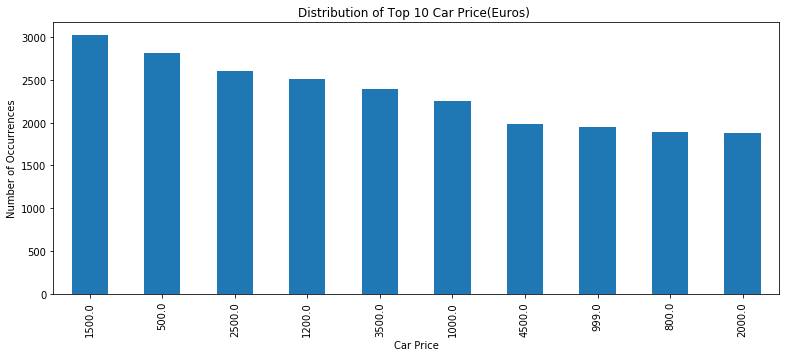

In [35]:
plt.figure(figsize=(13,5))
df['Car_Price'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Distribution of Top 10 Car Price(Euros) ')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Car Price', fontsize=10)
plt.show()

In [126]:
# maximum car were having the price around 1500 euro.

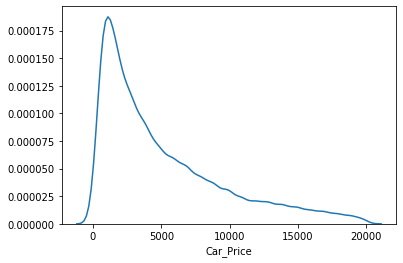

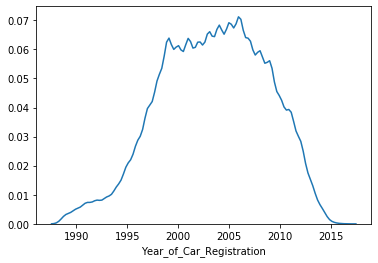

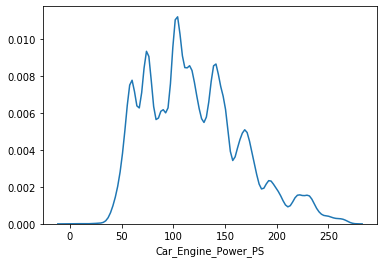

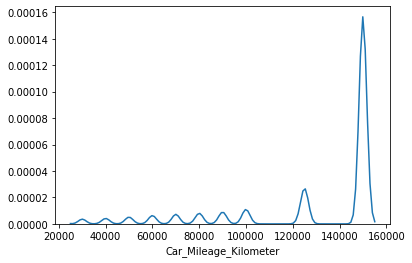

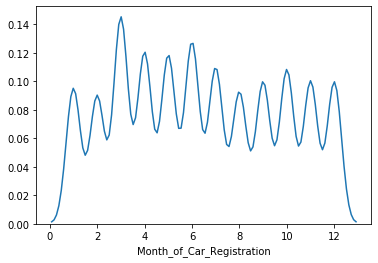

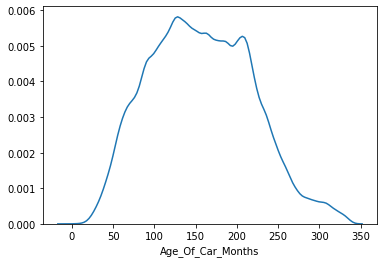

Age_Of_Car_Months


In [36]:
for i in df:
    if df[i].dtype!='object':
        sns.distplot(df[i],hist=False)
        plt.show()
print(i)

<Figure size 936x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Top 10 Car Mileage in Kilometers')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Car Mileage in Kilometers')

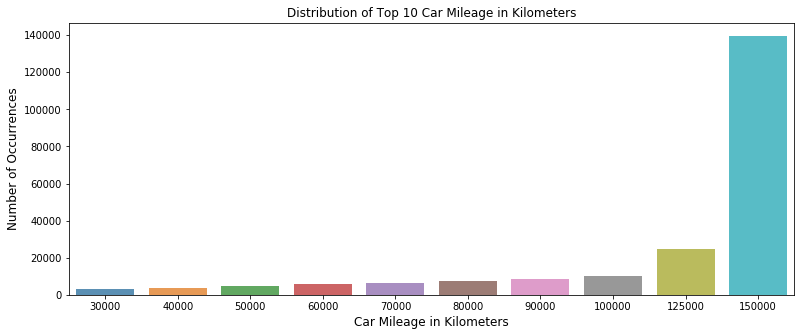

In [37]:
Car_Mileage_Kilometer_Count = df['Car_Mileage_Kilometer'].value_counts()
Car_Mileage_Kilometer_Count = Car_Mileage_Kilometer_Count[:10,]
plt.figure(figsize=(13,5))
sns.barplot(Car_Mileage_Kilometer_Count.index, Car_Mileage_Kilometer_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Car Mileage in Kilometers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Mileage in Kilometers', fontsize=12)
plt.show()

<Figure size 936x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Top 10 Car Engine Power in PS')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Car Engine Power in PS')

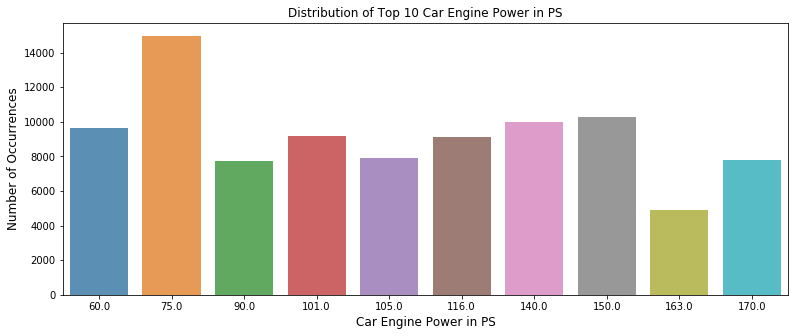

In [38]:
Car_Engine_Power_PS_Count = df['Car_Engine_Power_PS'].value_counts()
Car_Engine_Power_PS_Count = Car_Engine_Power_PS_Count[:10,]
plt.figure(figsize=(13,5))
sns.barplot(Car_Engine_Power_PS_Count.index, Car_Engine_Power_PS_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Car Engine Power in PS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Engine Power in PS', fontsize=12)
plt.show()

<Figure size 936x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Top 10 Year of Car Registration')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Year of Car Registation')

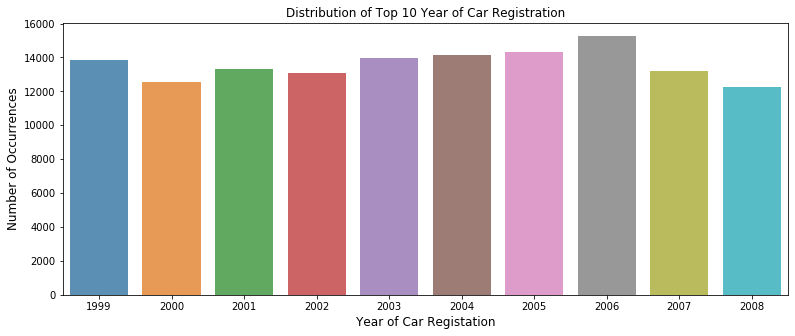

In [39]:
Year_of_Car_Registration_Count = df['Year_of_Car_Registration'].value_counts()
Year_of_Car_Registration_Count = Year_of_Car_Registration_Count[:10,]
plt.figure(figsize=(13,5))
sns.barplot(Year_of_Car_Registration_Count.index, Year_of_Car_Registration_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Year of Car Registration')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year of Car Registation', fontsize=12)
plt.show()

<Figure size 936x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Month of Car Registration')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Month of Car Registation')

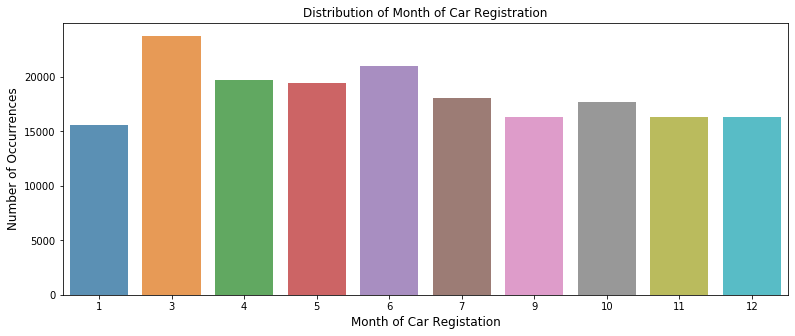

In [40]:
Month_of_Car_Registration_Count = df['Month_of_Car_Registration'].value_counts()
Month_of_Car_Registration_Count = Month_of_Car_Registration_Count[:10,]
plt.figure(figsize=(13,5))
sns.barplot(Month_of_Car_Registration_Count.index, Month_of_Car_Registration_Count.values, alpha=0.8)
plt.title('Distribution of Month of Car Registration')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month of Car Registation', fontsize=12)
plt.show()

## Bivariate Analysis

In [43]:
df.head()

,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Age_Of_Car_Months
0,private,offer,1500.0,test,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,186
1,private,offer,3600.0,test,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,101
2,private,offer,650.0,test,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,254
3,private,offer,2200.0,test,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,148
4,private,offer,2000.0,control,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,144


In [42]:
# Correlation using .corr() method - Matrix table of relationship among the autos attributes
df.corr()

,Car_Price,Year_of_Car_Registration,Car_Engine_Power_PS,Car_Mileage_Kilometer,Month_of_Car_Registration,Age_Of_Car_Months
Car_Price,1.000000,0.687012,0.516679,-0.421366,0.013521,-0.687206
Year_of_Car_Registration,0.687012,1.000000,0.183766,-0.470777,-0.012585,-0.998538
Car_Engine_Power_PS,0.516679,0.183766,1.000000,0.108103,0.020949,-0.184755
Car_Mileage_Kilometer,-0.421366,-0.470777,0.108103,1.000000,0.002247,0.470287
Month_of_Car_Registration,0.013521,-0.012585,0.020949,0.002247,1.000000,-0.041492
Age_Of_Car_Months,-0.687206,-0.998538,-0.184755,0.470287,-0.041492,1.000000


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

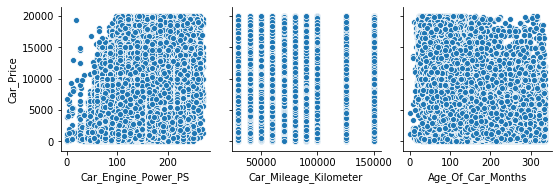

In [109]:
#Pair Plots between Car_Price and other numerical variables
plt.figure(figsize=(10,8))
sns.pairplot(data=df,y_vars=['Car_Price'],x_vars=['Car_Engine_Power_PS', 'Car_Mileage_Kilometer', 'Age_Of_Car_Months'])
plt.show()

The above two outputs show the numerical and graphical charts that highlight 
the relationship among the attributes in the data.

In [80]:
a=df[['Car_Price','Car_Engine_Power_PS','Car_Mileage_Kilometer','Age_Of_Car_Months']]

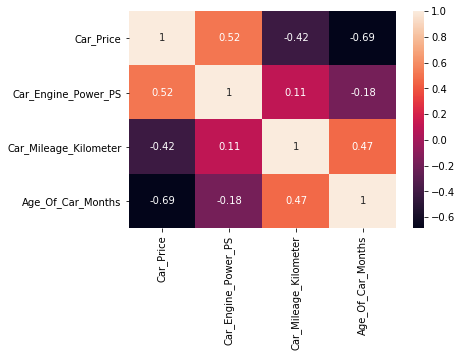

In [81]:
sns.heatmap(a.corr(),annot=True)
plt.show()

The correlation results show a positive correlation of (0.51) between Car_Price and Car_Engine_Power_PS. 
That means an increase in Car-Engine_Power_PS would have an increase in the Car_Price. 
Conversely, there is negative correlation between Car_Mileage_Kilometer and Car_Price. 
Also, there is negative correlation between Age_of_Car_Months and Car_Price. 
It is a well-known fact the value of a car(Car_Price) decreases as the age of the car goes up.

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

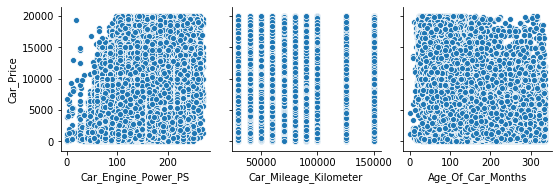

In [71]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df,y_vars='Car_Price',x_vars=['Car_Engine_Power_PS', 'Car_Mileage_Kilometer', 'Age_Of_Car_Months'],diag_kind='hist')
plt.show()

<Figure size 1296x432 with 0 Axes>

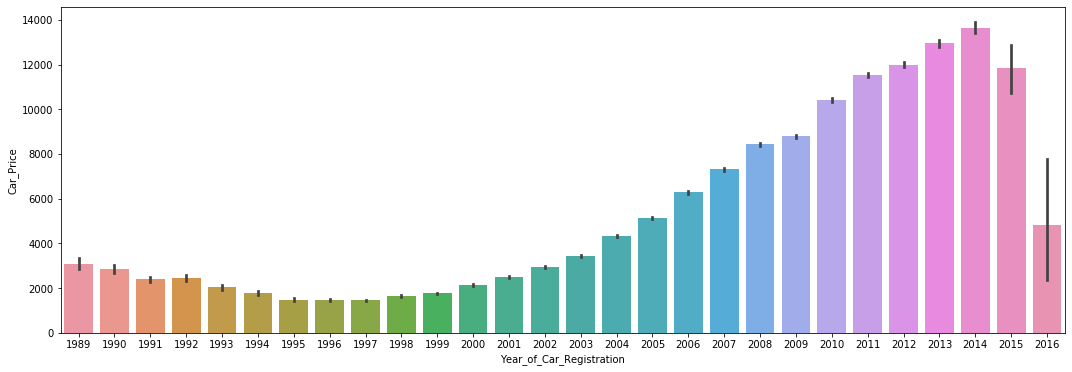

In [61]:
plt.figure(figsize=(18,6))
sns.barplot(x='Year_of_Car_Registration',y='Car_Price',data=df)
plt.show()

<Figure size 1296x432 with 0 Axes>

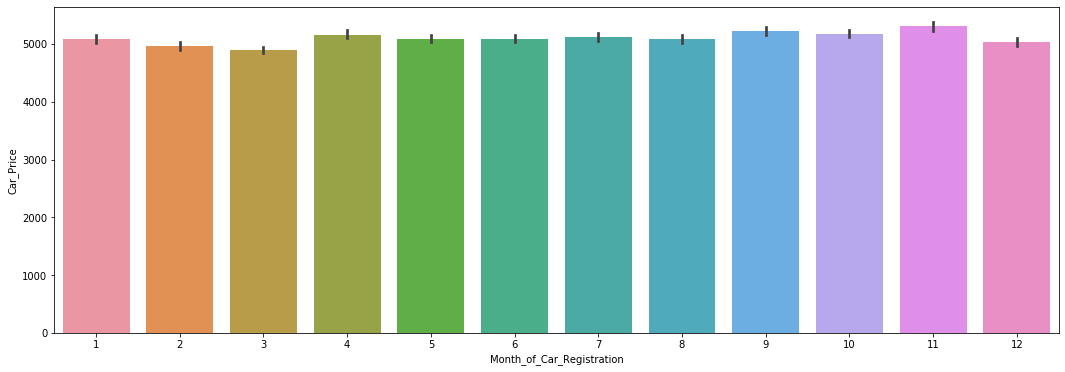

In [60]:
plt.figure(figsize=(18,6))
sns.barplot(x='Month_of_Car_Registration',y='Car_Price',data=df)
plt.show()

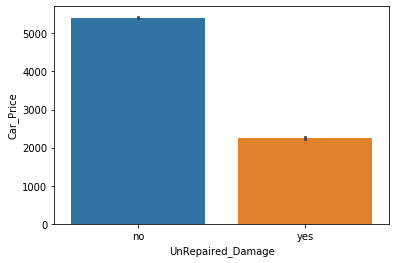

In [58]:
sns.barplot(x='UnRepaired_Damage',y='Car_Price',data=df)
plt.show()

<Figure size 1296x432 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

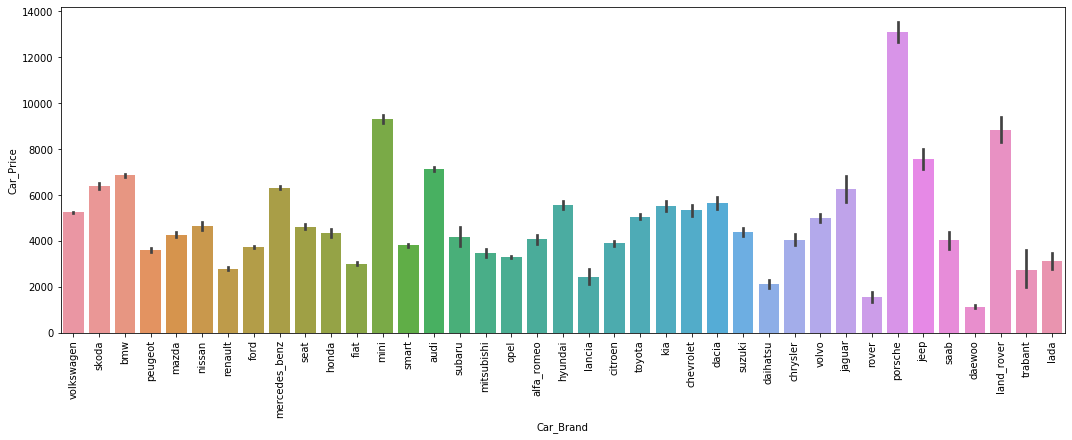

In [57]:
plt.figure(figsize=(18,6))
sns.barplot(x='Car_Brand',y='Car_Price',data=df)
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x432 with 0 Axes>

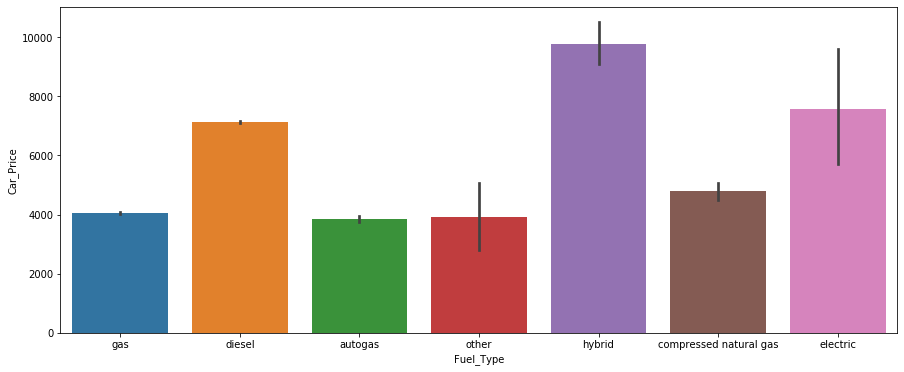

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(x='Fuel_Type',y='Car_Price',data=df)
plt.show()

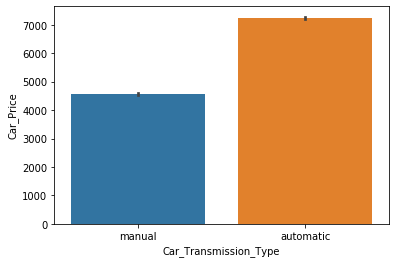

In [52]:
sns.barplot(x='Car_Transmission_Type',y='Car_Price',data=df)
plt.show()

<Figure size 1080x432 with 0 Axes>

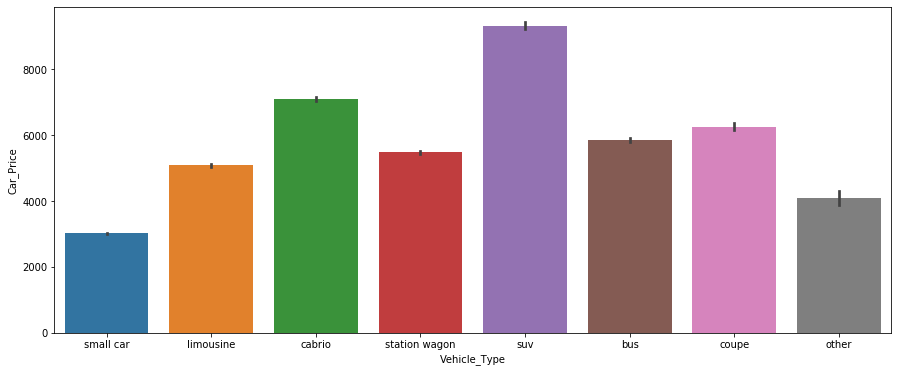

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(x='Vehicle_Type',y='Car_Price',data=df)
plt.show()

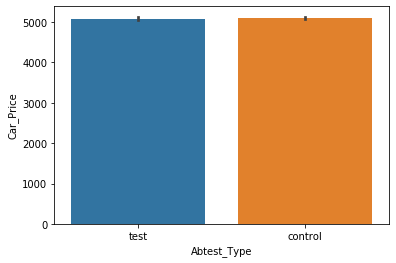

In [49]:
sns.barplot(x='Abtest_Type',y='Car_Price',data=df)
plt.show()

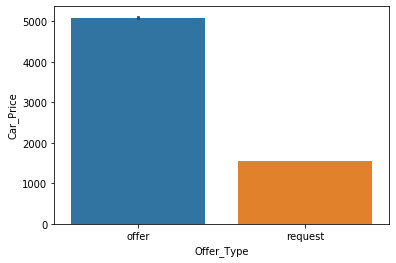

In [48]:
sns.barplot(x='Offer_Type',y='Car_Price',data=df)
plt.show()

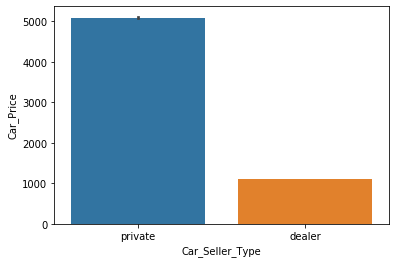

In [47]:
sns.barplot(x='Car_Seller_Type',y='Car_Price',data=df)
plt.show()